In [36]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt

In [37]:
img=cv2.imread('C:\\Users\\Dell\\Desktop\\sports\\model\\testimage\\sharapova1.jpg')

In [38]:
print(img)

[[[200 179 157]
  [200 179 157]
  [200 179 157]
  ...
  [195 181 158]
  [194 180 157]
  [193 179 156]]

 [[200 179 157]
  [200 179 157]
  [200 179 157]
  ...
  [196 182 159]
  [194 180 157]
  [193 179 156]]

 [[200 179 157]
  [200 179 157]
  [200 179 157]
  ...
  [196 182 159]
  [195 181 158]
  [193 179 156]]

 ...

 [[ 26  58 158]
  [ 30  59 163]
  [ 33  59 165]
  ...
  [154 120  84]
  [154 120  84]
  [154 120  84]]

 [[ 30  62 162]
  [ 32  61 165]
  [ 35  61 167]
  ...
  [154 120  84]
  [154 120  84]
  [154 120  84]]

 [[ 35  67 167]
  [ 34  63 167]
  [ 36  62 168]
  ...
  [153 119  83]
  [153 119  83]
  [153 119  83]]]


In [39]:
img.shape


(555, 700, 3)

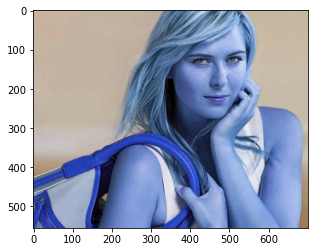

In [40]:
plt.imshow(img)

In [41]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [42]:
gray.shape

(555, 700)

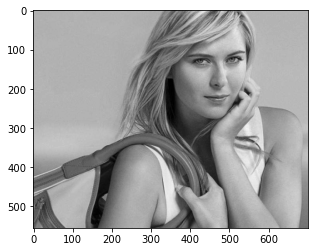

In [43]:
plt.imshow(gray,cmap='gray')

In [44]:
face_cascade=cv2.CascadeClassifier('C:/Users/Dell/Desktop/sports/model/opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade=cv2.CascadeClassifier('C:/Users/Dell/Desktop/sports/model/opencv/haarcascades/haarcascade_eye.xml')
faces=face_cascade.detectMultiScale(gray,1.3,5)
faces

array([[352,  38, 233, 233]])

In [45]:
(x,y,w,h)=faces[0]
x,y,w,h

(352, 38, 233, 233)

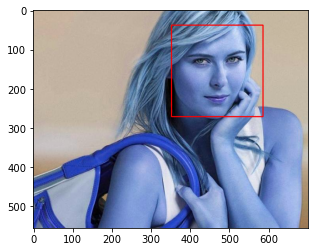

In [46]:
face_img=cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

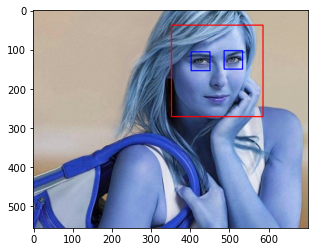

In [47]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img=cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray=gray[y:y+h,x:x+w]
    roi_color=face_img[y:y+h,x:x+w]
    eyes=eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
            cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,0,255),2)

        
plt.figure()
plt.imshow(face_img,cmap="gray")
plt.show()
    

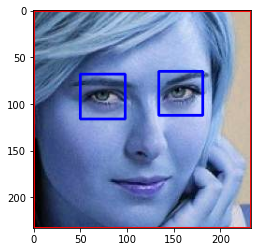

In [48]:
plt.imshow(roi_color,cmap="gray")


In [49]:
def get_cropped_image_if_2_eyes(image_path):
    img=cv2.imread(image_path)
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces=face_cascade.detectMultiScale(gray,1.3,5)
    for (x,y,w,h) in faces:
        roi_gray=gray[y:y+h,x:x+w]
        roi_color=img[y:y+h,x:x+w]
        eyes=eye_cascade.detectMultiScale(roi_gray)
        if len(eyes)>=2:
            return roi_color

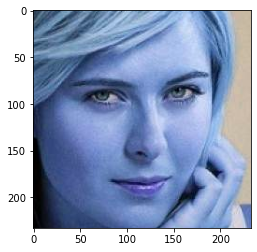

In [50]:
cropped_image=get_cropped_image_if_2_eyes("C:\\Users\\Dell\\Desktop\\sports\\model\\testimage\\sharapova1.jpg")
plt.imshow(cropped_image)

In [51]:
cropped_image=get_cropped_image_if_2_eyes("C:\\Users\\Dell\\Desktop\\sports\\model\\testimage\\sharapova1.jpg")
cropped_image

array([[[ 84, 105, 126],
        [ 66,  86, 104],
        [ 50,  69,  90],
        ...,
        [199, 185, 162],
        [199, 185, 162],
        [199, 185, 162]],

       [[ 73,  93, 111],
        [ 53,  73,  91],
        [ 41,  60,  81],
        ...,
        [199, 185, 162],
        [199, 185, 162],
        [198, 184, 161]],

       [[ 68,  88, 106],
        [ 52,  69,  88],
        [ 45,  64,  85],
        ...,
        [200, 186, 163],
        [200, 186, 163],
        [201, 187, 164]],

       ...,

       [[ 10,   6,  11],
        [  5,   2,   4],
        [  0,   0,   1],
        ...,
        [109, 128, 185],
        [102, 123, 184],
        [105, 127, 193]],

       [[  9,   5,  10],
        [  4,   1,   3],
        [  0,   0,   1],
        ...,
        [110, 130, 185],
        [102, 123, 184],
        [106, 128, 194]],

       [[  8,   4,   9],
        [  2,   0,   1],
        [  0,   0,   1],
        ...,
        [112, 132, 187],
        [101, 122, 183],
        [105, 127, 193]]

In [55]:
path_to_data="./dataset/"
path_to_cr_data="./dataset/cropped/"

In [56]:
import os
img_dirs=[]
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [57]:
img_dirs

['./dataset/lionel_messi',
 './dataset/maria_sharapova',
 './dataset/roger_federer',
 './dataset/serena_williams',
 './dataset/virat_kohli']

In [58]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [59]:
cropped_image_dirs=[]
celebrity_file_names_dict={}
for img_dir in img_dirs:
    count=1
    celebrity_name=img_dir.split('/')[-1]
    print(celebrity_name)
    celebrity_file_names_dict[celebrity_name]=[]
    for entry in os.scandir(img_dir):
        roi_color=get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder=path_to_cr_data+celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generatingg cropped images in folder:",cropped_folder)
                
            cropped_file_name=celebrity_name+str(count)+".png"
            cropped_file_path=cropped_folder+"/"+cropped_file_name
            
            cv2.imwrite(cropped_file_path,roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count=count+1
                
            
            

lionel_messi
Generatingg cropped images in folder: ./dataset/cropped/lionel_messi
maria_sharapova
Generatingg cropped images in folder: ./dataset/cropped/maria_sharapova
roger_federer
Generatingg cropped images in folder: ./dataset/cropped/roger_federer
serena_williams
Generatingg cropped images in folder: ./dataset/cropped/serena_williams
virat_kohli
Generatingg cropped images in folder: ./dataset/cropped/virat_kohli


In [60]:
import numpy as np
import pywt
import cv2

def w2d(img,mode='haar',level=1):
    imArray=img
    imArray=cv2.cvtColor(imArray,cv2.COLOR_RGB2GRAY)
    imArray=np.float32(imArray)
    imArray /=255;
    coeffs=pywt.wavedec2(imArray,mode,level=level)
    coeffs_H=list(coeffs)
    coeffs_H[0]*=0;
    imArray_H=pywt.waverec2(coeffs_H,mode)
    imArray_H*=255
    imArray_H=np.uint8(imArray_H)
    
    return imArray_H
    

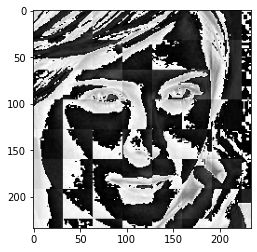

In [61]:
im_har=w2d(cropped_image,'db1',5)
plt.imshow(im_har,cmap='gray')

In [63]:
celebrity_file_names_dict

{'lionel_messi': ['./dataset/cropped/lionel_messi/lionel_messi1.png',
  './dataset/cropped/lionel_messi/lionel_messi2.png',
  './dataset/cropped/lionel_messi/lionel_messi3.png',
  './dataset/cropped/lionel_messi/lionel_messi4.png',
  './dataset/cropped/lionel_messi/lionel_messi5.png',
  './dataset/cropped/lionel_messi/lionel_messi6.png',
  './dataset/cropped/lionel_messi/lionel_messi7.png',
  './dataset/cropped/lionel_messi/lionel_messi8.png',
  './dataset/cropped/lionel_messi/lionel_messi9.png',
  './dataset/cropped/lionel_messi/lionel_messi10.png',
  './dataset/cropped/lionel_messi/lionel_messi11.png',
  './dataset/cropped/lionel_messi/lionel_messi12.png',
  './dataset/cropped/lionel_messi/lionel_messi13.png',
  './dataset/cropped/lionel_messi/lionel_messi14.png',
  './dataset/cropped/lionel_messi/lionel_messi15.png',
  './dataset/cropped/lionel_messi/lionel_messi16.png',
  './dataset/cropped/lionel_messi/lionel_messi17.png',
  './dataset/cropped/lionel_messi/lionel_messi18.png',
  '

In [62]:
class_dict={}
count=0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name]=count
    count+=1
class_dict


{'lionel_messi': 0,
 'maria_sharapova': 1,
 'roger_federer': 2,
 'serena_williams': 3,
 'virat_kohli': 4}

In [13]:
x=[]
y=[]
for celebrity_name,training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img=cv2.imread(training_image)
        if img is None:
            continue
        scalled_raw_img=cv2.resize(img,(32,32))
        img_har=w2d(img,'db1',5)
        scalled_img_har=cv2.resize(img_har,(32,32))
        combined_img=np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        x.append(combined_img)
        y.append(class_dict[celebrity_name])

NameError: name 'celebrity_file_names_dict' is not defined

In [71]:
len(x)

167

In [72]:
x=np.array(x).reshape(len(x),4096).astype(float)
x.shape

(167, 4096)

In [73]:
x[0]

array([100., 129., 140., ..., 237., 234., 232.])

In [11]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline


In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)
pipe=Pipeline([('scaler',StandardScaler()),('svc',SVC(kernel='rbf',C=10))])
pipe.fit(x_train,y_train)
pipe.score(x_test,y_test)

NameError: name 'x' is not defined

In [2]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [9]:
model_params={
    'svm':{
        'model':svm.SVC(gamma='auto'),
        'params':{
            'svc__C':[1,10,100,1000],
            'svc__kernel':['rbf','linear']
        }
    },
    'random_forest':{
    'model':RandomForestClassifier(),
    'params':{
        'randomforestclassifier__n_estimators':[1,5,10]
        
    }
    },
    'logistic_regression':
    {
    'model':LogisticRegression(solver='liblinear',multi_class='auto'),
    'params':{
        'logisticregression__C':[1,5,10]
        
    }
}
}

In [10]:
scores=[]
best_estimators={}
import pandas as pd 
for algo,mp in model_params.items():
    pipe=make_pipeline(StandardScaler(),mp['model'])
    clf=GridSearchCV(pipe,mp['params'],cv=5,return_train_score=False)
    clf.fit(x_train,y_train)
    scores.append({
        'model':algo,
        'best_score':clf.best_score_,
        'best_params':clf.best_params_
    })
    best_estimators[algo]=clf.best_estimator_
df=pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

NameError: name 'StandardScaler' is not defined

In [8]:
best_estimators

{}

In [93]:
best_estimators['svm'].score(x_test,y_test)

0.9523809523809523

In [94]:
best_clf=best_estimators['svm']

In [95]:
!pip install joblib

Defaulting to user installation because normal site-packages is not writeable


In [96]:
import joblib
joblib.dump(best_clf,'saved_model.pkl')

['saved_model.pkl']

In [97]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))